In [1]:
import pandas as pd 

In [2]:
#pip uninstall imblearn

In [3]:
#pip install  scikit-learn

In [4]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, plot_confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

#Ignorando warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [5]:
df = pd.read_csv(r'C:\Users\141477\Desktop\Gabriel\Trabalho Final\customer-churn.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#Imprimindo a quantidade de dados e variáveis
print("Quantidade de dados:", df.shape[0])
print("Quantidade de variáveis:", df.shape[1])

Quantidade de dados: 7043
Quantidade de variáveis: 21


In [8]:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:

df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [10]:
def Map_Var_DF (features, df):
  #dicionário para receber as variáveis
  dict_var = {"feature": [],
              "Tipo": [],
              "Categórico": [],
              "Binário": [],
              "Valores Categóricos": [],
              "Min": [],
              "Max": [],
              "Qtd de Nulos": []}

  #Criando um loop 
  for feature in features:

    #eature
    dict_var['feature'].append(feature)

    #variável
    dict_var['Tipo'].append(df[feature].dtypes)

    #valores mínimos
    dict_var['Min'].append(df[feature].min())

    #alores máximos
    dict_var['Max'].append(df[feature].max())

    #alores nulos
    dict_var['Qtd de Nulos'].append(df[feature].isnull().sum())

    if ((df[feature].dtype == "O") or (df[feature].nunique() == 2)) and (feature != "TotalCharges"):

      #valor 1 se a variável for categórica
      dict_var['Categórico'].append(1)

      #Aalores categóricos
      dict_var['Valores Categóricos'].append(df[feature].value_counts().index.to_list())

      if (df[feature].nunique() == 2):

        #valor 1 se a variável for binária
        dict_var['Binário'].append(1)
        
      else:

        #valor 0 se a variável não for binária
        dict_var['Binário'].append(0)

    else:

      #valor 0 se a variável não for categórica
      dict_var['Categórico'].append(0)

      #valores categóricos
      dict_var['Valores Categóricos'].append(["N/A"])

      #valor 0 se a variável não for binária
      dict_var['Binário'].append(0)
      
  #dicionário em dataframe
  df_var = pd.DataFrame.from_dict(data = dict_var)


  return df_var

Análises de Features

In [11]:
#nomes das variáveis
features = df.columns.to_list()

#tirando o 'CustomerID'
features.remove('customerID')


df_var = Map_Var_DF(features = features, df = df)


df_var

,feature,Tipo,Categórico,Binário,Valores Categóricos,Min,Max,Qtd de Nulos
0,gender,object,1,1,"[Male, Female]",Female,Male,0
1,SeniorCitizen,int64,1,1,"[0, 1]",0,1,0
2,Partner,object,1,1,"[No, Yes]",No,Yes,0
3,Dependents,object,1,1,"[No, Yes]",No,Yes,0
4,tenure,int64,0,0,[N/A],0,72,0
5,PhoneService,object,1,1,"[Yes, No]",No,Yes,0
6,MultipleLines,object,1,0,"[No, Yes, No phone service]",No,Yes,0
7,InternetService,object,1,0,"[Fiber optic, DSL, No]",DSL,No,0
8,OnlineSecurity,object,1,0,"[No, Yes, No internet service]",No,Yes,0
9,OnlineBackup,object,1,0,"[No, Yes, No internet service]",No,Yes,0


In [12]:


df_trat = df.copy()

#ariáveis categóricas
cat_features = df_var["feature"].loc[ df_var["Categórico"] == 1 ].to_list()


for cat_feature in cat_features:

  #Converteros valores da feature 
  df_trat[cat_feature] = df_trat[cat_feature].apply(lambda x: "No" if x == "No internet service" else x)
  df_trat[cat_feature] = df_trat[cat_feature].apply(lambda x: "No" if x == "No phone service" else x)

In [13]:

df_trat.loc[ df_trat["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:

#print(df_trat[['tenure','TotalCharges']])
df_trat[['tenure','TotalCharges']].query('TotalCharges == " "')

,tenure,TotalCharges
488,0,
753,0,
936,0,
1082,0,
1340,0,
3331,0,
3826,0,
4380,0,
5218,0,
6670,0,


In [15]:
#Convertendo os valores com aspas para 0
df_trat['TotalCharges'] = df_trat['TotalCharges'].apply(lambda x: 0 if x == " " else x)

#to float
df_trat['TotalCharges'] = df_trat['TotalCharges'].astype('float64')

In [16]:
#Criando um novo dataframe com as variáveis tratadas
df_var_trat = Map_Var_DF(features = features, df = df_trat)


df_var_trat

,feature,Tipo,Categórico,Binário,Valores Categóricos,Min,Max,Qtd de Nulos
0,gender,object,1,1,"[Male, Female]",Female,Male,0
1,SeniorCitizen,int64,1,1,"[0, 1]",0,1,0
2,Partner,object,1,1,"[No, Yes]",No,Yes,0
3,Dependents,object,1,1,"[No, Yes]",No,Yes,0
4,tenure,int64,0,0,[N/A],0,72,0
5,PhoneService,object,1,1,"[Yes, No]",No,Yes,0
6,MultipleLines,object,1,1,"[No, Yes]",No,Yes,0
7,InternetService,object,1,0,"[Fiber optic, DSL, No]",DSL,No,0
8,OnlineSecurity,object,1,1,"[No, Yes]",No,Yes,0
9,OnlineBackup,object,1,1,"[No, Yes]",No,Yes,0


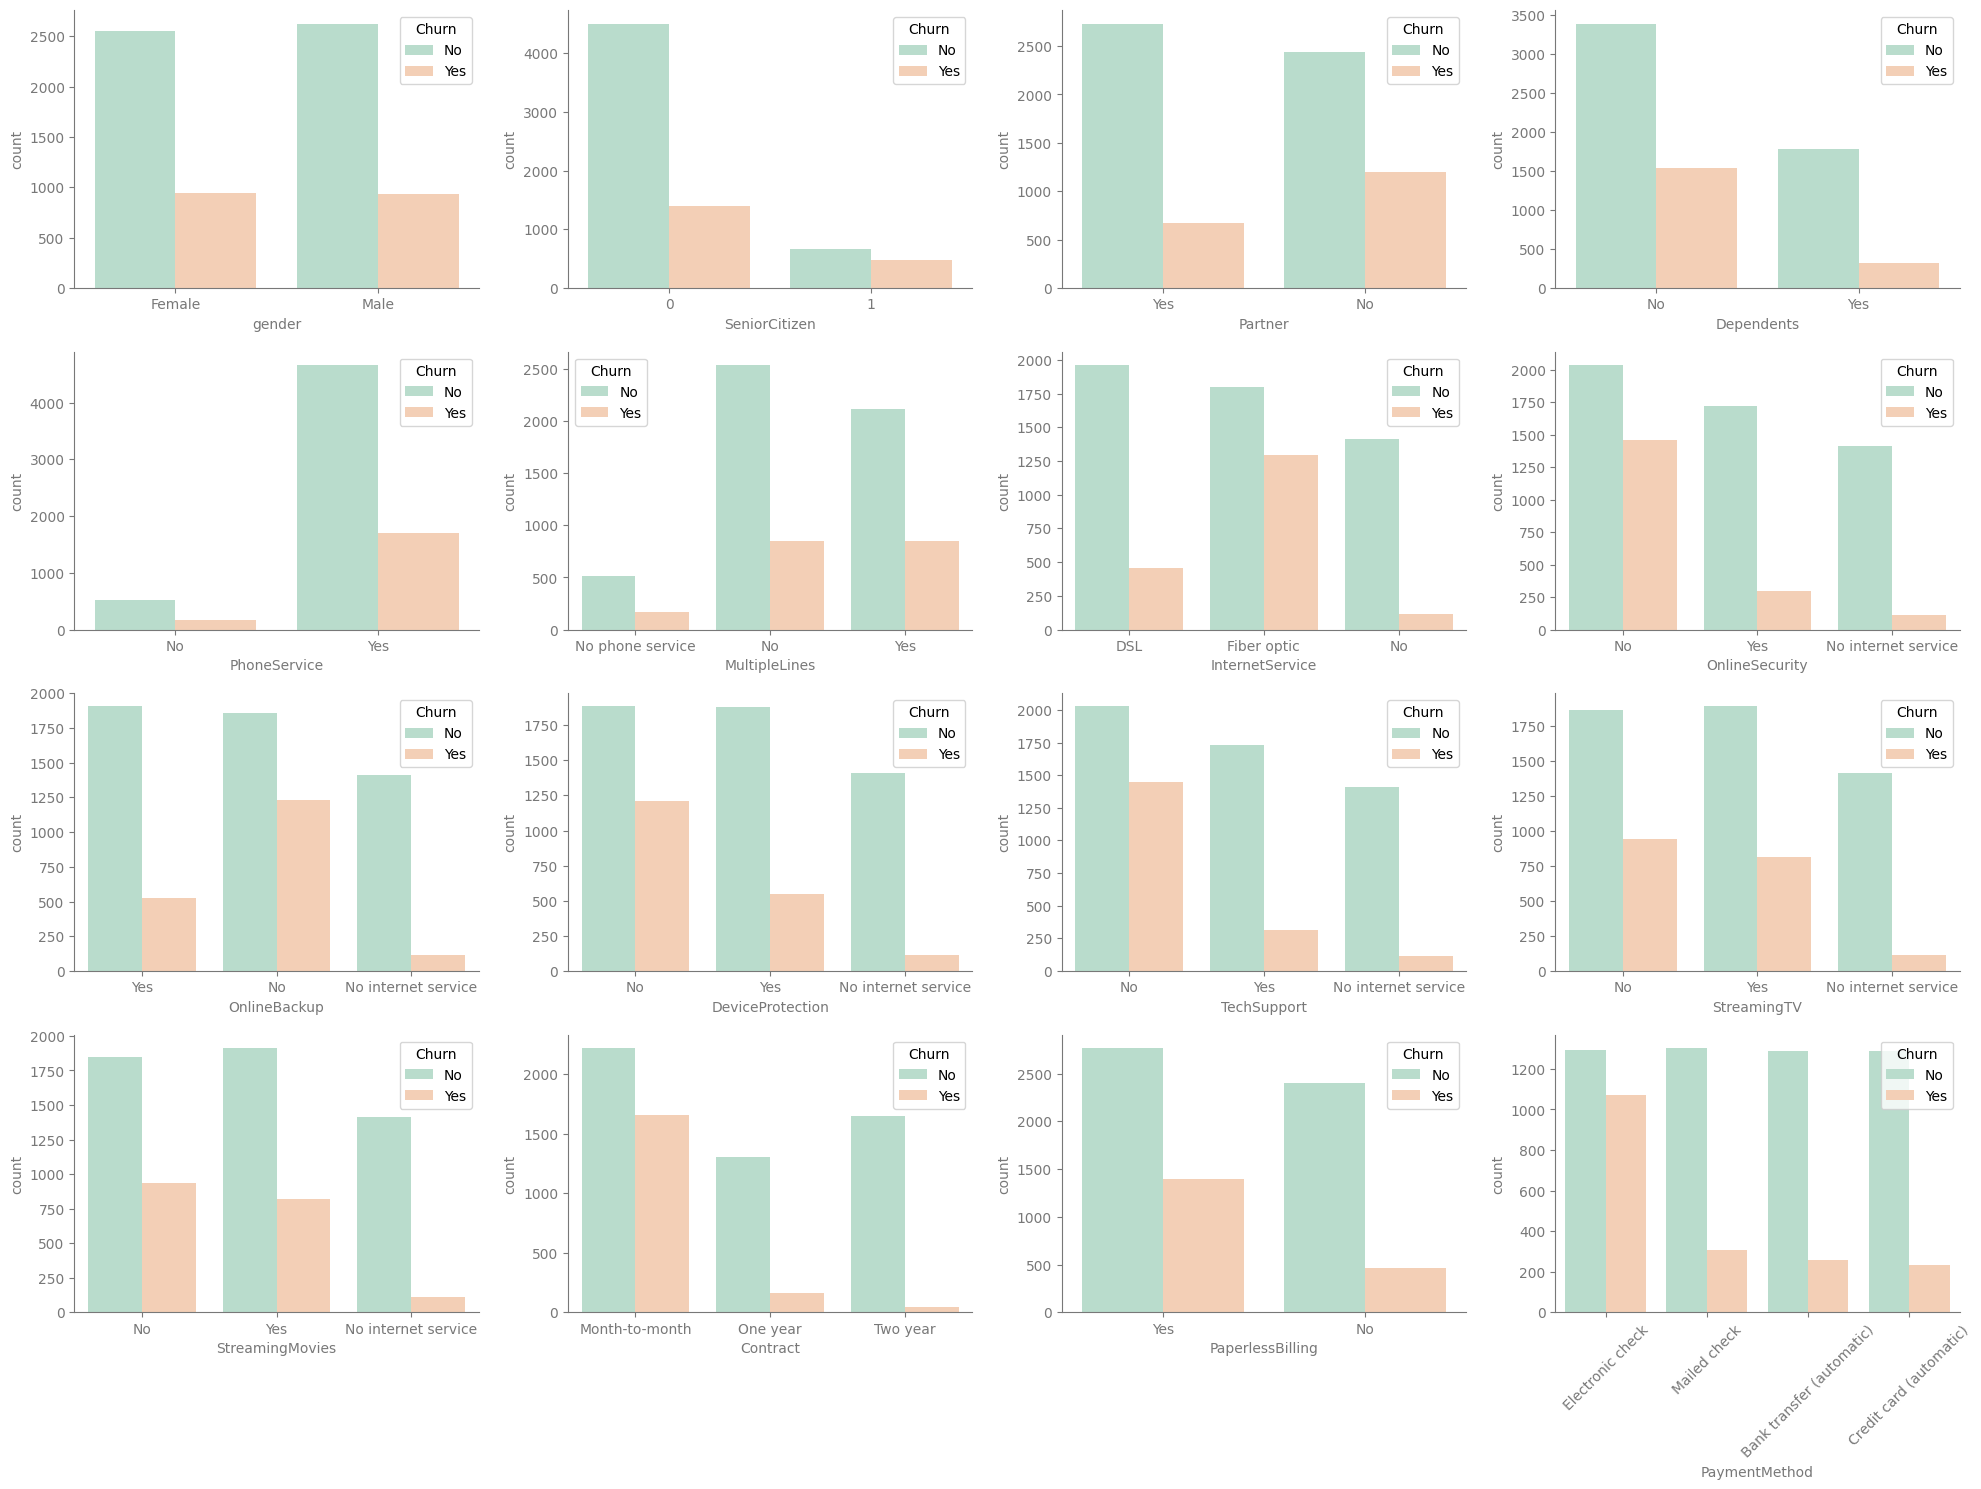

In [17]:

rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12,
             'axes.titlepad': 12
             }

#parâmetros no matplotlib
with plt.rc_context(rc_params):

  #Instanciando a classe figure e axes
  fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (20,15))

  #Definindo um contandor para pecorrer o axes
  cont_row = 0
  cont_col = 0

  #Criando um loop para gerar um gráfico de feature
  for cat_feature in df_var_trat["feature"].loc[(df_var_trat['Categórico'] == 1) & (df_var_trat['feature'] != "Churn") ].to_list():

    
    sns.countplot(x = cat_feature, data = df, ax = ax[cont_row, cont_col], hue = "Churn", palette = "Pastel2")

    #Definindo uma lógica de incremento nos contadores do axes
    if cont_col == 3:
      cont_col = 0
      cont_row = cont_row + 1
    else:
      cont_col = cont_col + 1

  
  plt.xticks(rotation = 45)

  #Exibindo o gráfico
  plt.tight_layout()

In [18]:
#setando os parâmetros no matplotlib
with plt.rc_context(rc_params):

  #Instanciando o objeto figure e axes
  fig, ax = plt.subplots( nrows = 3, ncols = 1, figsize = (15,10))

  #variável tenure
  sns.histplot(data = df_trat, x = 'tenure', ax = ax[0], hue = "Churn")

  #Setando o título do gráfico
  ax[0].set_title("Histograma variável tenure")

  #Criando um histograma para variável MontlyCharges
  sns.histplot(data = df_trat, x = 'MonthlyCharges', ax = ax[1], hue = "Churn")

  #Setando o título do gráfico
  ax[1].set_title("Histograma variável MontlyCharges")

  #Criando um histograma para a variável TotalCharges
  sns.histplot(data = df_trat, x = 'TotalCharges', ax = ax[2], hue = "Churn")

  #Setando o título do gráfico
  ax[2].set_title("Histograma variável TotalCharges")

  #Exibindo o gráfico
  plt.tight_layout()

Percentual de churn em ralação a base 26.54%


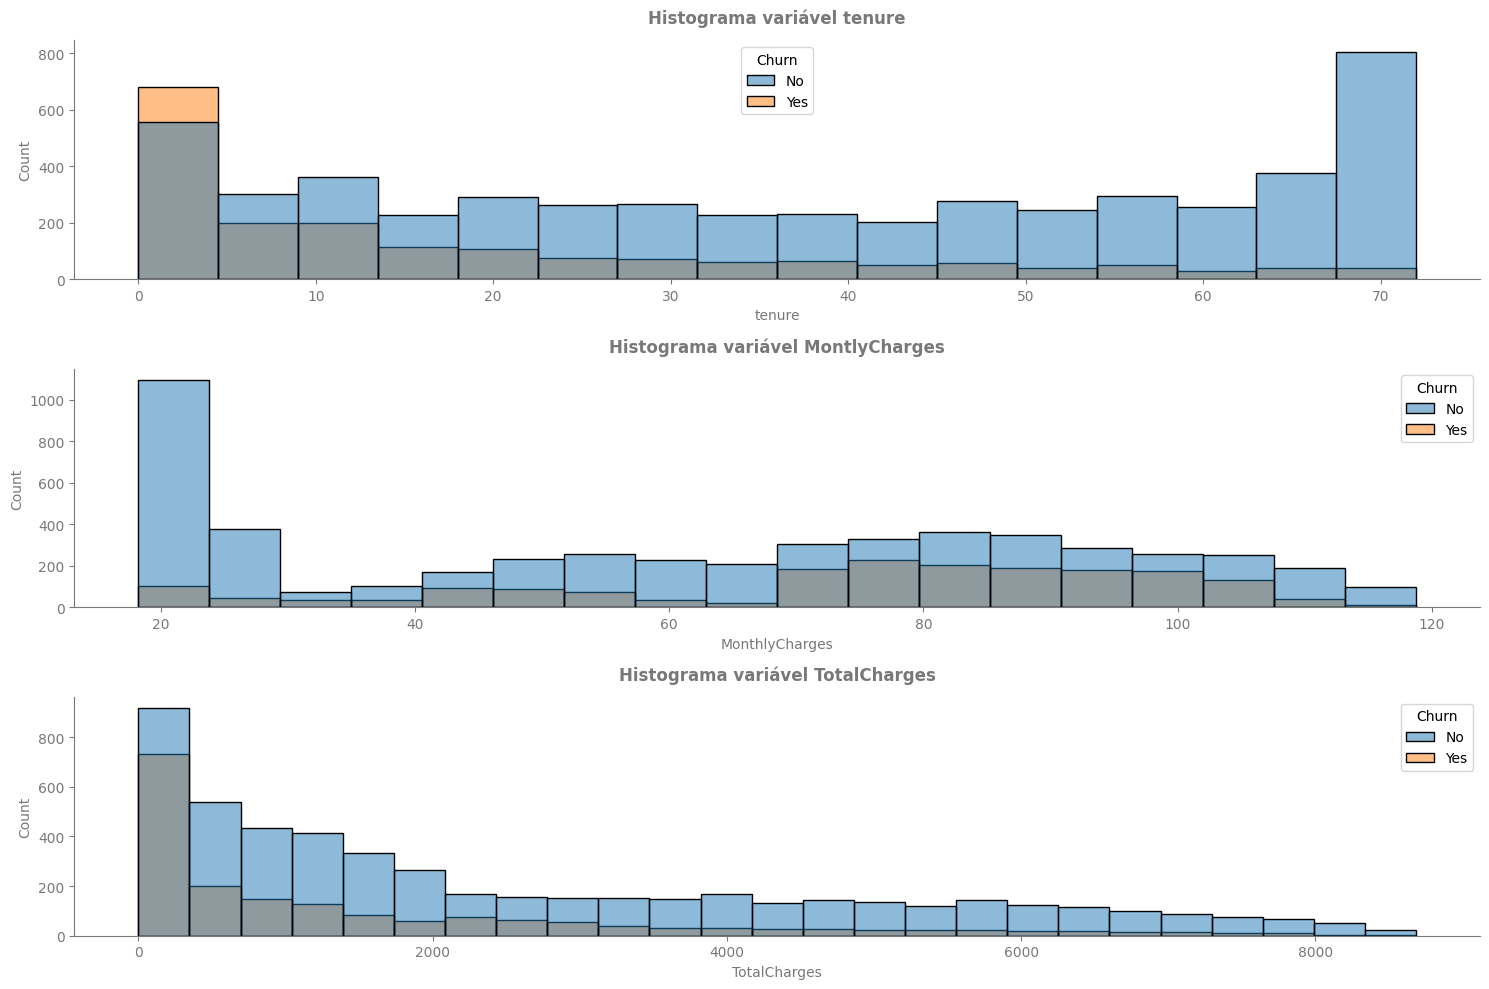

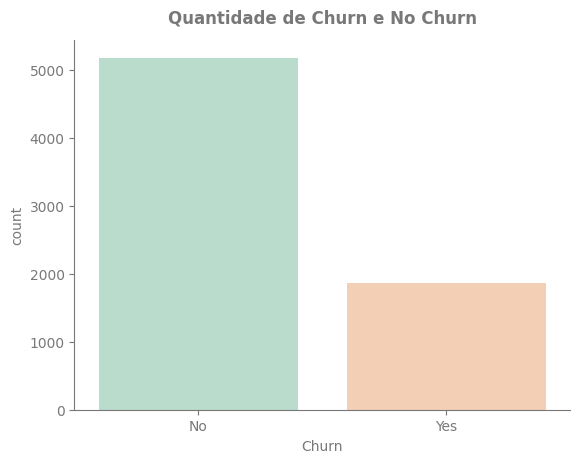

In [19]:
#setando os parâmetros no matplotlib
with plt.rc_context(rc_params):

  #Instanciando a Figure e Axes
  fig, ax = plt.subplots()

  #Criando o gráfico de countplot
  sns.countplot(x = 'Churn', 
                data = df_trat,
                ax = ax,
                palette = "Pastel2")
  
  #Exibindo o título
  ax.set_title("Quantidade de Churn e No Churn")

  #Armazena o % da amostra
  percentual_churn = round((df_trat['Churn'].value_counts()[1] / df_trat.shape[0])*100,2)

  #Criar uma informação no gráfico
  
  #Exibindo o gráfico
  print ('Percentual de churn em ralação a base ' + str(percentual_churn) +'%')
  plt.show()

In [20]:
#Armazenando as variáveis categóricas e não binárias
cat_features = df_var_trat['feature'].loc[ (df_var_trat['Categórico'] == 1) & (df_var_trat['Binário'] == 0) ].to_list()

#Armazenando as variáveis binárias
bin_features = df_var_trat['feature'].loc[ df_var_trat['Binário'] == 1 ].to_list()

#Armazenando as variáveis numéricas
num_features = df_var_trat['feature'].loc[ df_var_trat['Categórico'] == 0 ].to_list()

In [21]:

bin_features.remove("SeniorCitizen")

#LabelEncorder
le = LabelEncoder()


for bin_feature in bin_features:


  df_trat[bin_feature] = le.fit_transform(df_trat[bin_feature])

df_trat = pd.get_dummies(data = df_trat, columns = cat_features)

In [22]:

df_trat.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [23]:

X = df_trat.drop(['customerID', 'Churn'], axis = 1)
y = df_trat['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    shuffle = True, 
                                                    stratify = y,
                                                    random_state = 42)

In [36]:
from imblearn.under_sampling import RandomUnderSampler
#Instanciando o objeto RandomUnderSampler()
rus = RandomUnderSampler()

#Balanceando a amostra
X_train_trt, y_train_trt = rus.fit_resample(X_train, y_train)

#Transformando o array X em dataframe e y em série
X_train_trt = pd.DataFrame(X_train_trt, columns = X_train.columns)
y_train_trt = pd.Series(y_train_trt)

In [37]:
#Instanciando os parâmetros do Kfold para Validação Cruzada
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [38]:
#Escalonando as variáveis numéricas
num_scaled = ColumnTransformer([("Padronizar", StandardScaler(), num_features)],
                         remainder='passthrough')

In [40]:
#Importando o algoritmo de Random Forest
from sklearn.ensemble import RandomForestClassifier


pipe = make_pipeline(num_scaled, RandomForestClassifier(random_state = 42))


param_grid = {"randomforestclassifier__n_estimators": [10, 100, 1000],
              "randomforestclassifier__max_features": ['auto', 'sqrt', 'log2']}

#Instanciando o GridSearch
clf = GridSearchCV(estimator = pipe,
                   param_grid = param_grid,
                   scoring = 'recall',
                   n_jobs = -1,
                   cv = k_fold)


clf.fit(X = X_train_trt, 
        y = y_train_trt)


clf.best_params_

{'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__n_estimators': 1000}

In [41]:
#Importando o algoritmo de KNN
from sklearn.neighbors import KNeighborsClassifier


pipe = make_pipeline(num_scaled, KNeighborsClassifier())

param_grid = {"kneighborsclassifier__n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
              "kneighborsclassifier__metric": ["euclidean", "manhattan", "minkowski"],
              "kneighborsclassifier__weights": ['uniform', 'distance']}


clf = GridSearchCV(estimator = pipe,
                   param_grid = param_grid,
                   scoring = 'recall',
                   n_jobs = -1,
                   cv = k_fold)


clf.fit(X = X_train_trt, 
        y = y_train_trt)


clf.best_params_

{'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_neighbors': 17,
 'kneighborsclassifier__weights': 'uniform'}

In [1]:
#df sem o balanceando da amostra

name_model = []
recall = []




model_rf = RandomForestClassifier(n_estimators = 1000,
                                  max_features = 'auto',
                                  random_state = 42)



model_knn = KNeighborsClassifier(n_neighbors = 15,
                                 metric = 'manhattan',
                                 weights = 'uniform')



for model in [ model_rf,  model_knn]:


  pipe = make_pipeline(num_scaled, model)


  score = cross_val_score(estimator = pipe,
                          X = X_train,
                          y = y_train,
                          scoring = 'recall',
                          cv = k_fold)
  

  name_model.append(model.__class__.__name__)

  recall.append(score.mean())


df_model = pd.DataFrame(data = recall, 
                        index = name_model, 
                        columns = ['Recall'])


df_model

NameError: name 'RandomForestClassifier' is not defined

In [35]:

name_model = []
recall = []



model_rf = RandomForestClassifier(n_estimators = 1000,
                                  max_features = 'auto',
                                  random_state = 42)



model_knn = KNeighborsClassifier(n_neighbors = 15,
                                 metric = 'manhattan',
                                 weights = 'uniform')



for model in [ model_rf,  model_knn]:


  pipe = make_pipeline(num_scaled, model)

  score = cross_val_score(estimator = pipe,
                          X = X_train_trt,
                          y = y_train_trt,
                          scoring = 'recall',
                          cv = k_fold)

  name_model.append(model.__class__.__name__)


  recall.append(score.mean())


df_model = pd.DataFrame(data = recall, 
                        index = name_model, 
                        columns = ['Recall'])

#Imprmindo a tabela de resultado
df_model

,Recall
RandomForestClassifier,0.771584
KNeighborsClassifier,0.833407


In [42]:
#Copiando o dataframe do X_train e X_test
X_train_trt_scaled = X_train_trt.copy()
X_test_scaled = X_test.copy()

#Padronizando as variáveis numéricas
for num_feature in num_features:

  #Instanciando o objeto de padronização
  scaler = StandardScaler()

  #Ajustando as variáveis numéricas do X_train
  X_train_trt_scaled[num_feature] = scaler.fit_transform(X_train_trt_scaled[num_feature].values.reshape(-1,1))

  #Ajustando as variáveis numéricas de X_test com os mesmos parâmetros do X_train
  X_test_scaled[num_feature] = scaler.transform(X_test_scaled[num_feature].values.reshape(-1,1))



In [43]:
#Instanciando novamente o modelo escolhido
model_svc = KNeighborsClassifier(n_neighbors = 15,
                                 metric = 'manhattan',
                                 weights = 'uniform')

#Aplicando o modelo escolhido
model_svc.fit(X = X_train_trt_scaled,
              y = y_train_trt)



KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [44]:
#Fazendo a previsão com base nos dados de teste
y_pred = model_svc.predict(X_test_scaled)

# Classification Report
print(classification_report(y_test, y_pred))


print("--------------------------------------------------------------------")




              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1294
           1       0.48      0.84      0.61       467

    accuracy                           0.72      1761
   macro avg       0.70      0.76      0.70      1761
weighted avg       0.81      0.72      0.73      1761

--------------------------------------------------------------------


<AxesSubplot:>

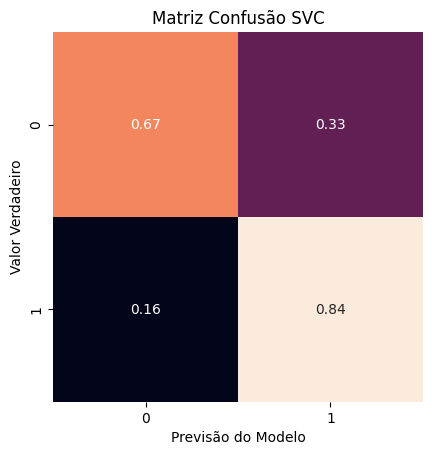

In [45]:
#Instanciando a figure e axes
fig, ax = plt.subplots()

#Plotando a matriz de confusão em um heatmap
sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true'), 
            square=True, 
            annot=True, 
            cbar=False,
            ax = ax)

#Definindo o nome do eixo x
ax.set_xlabel("Previsão do Modelo")

#Definindo o nome do eixo y
ax.set_ylabel("Valor Verdadeiro")

#Definindo o título
ax.set_title("Matriz Confusão SVC")

#Exibindo a matriz de confusão
plt.show()